# MME Attach成功率分析

## 1. 准备工作

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
pwd

'C:\\Users\\jliut'

### 1.2 切换到数据目录

In [5]:
cd r:/JXMCC/

r:\JXMCC


In [1]:
datafile = 'MME_attachsuccrate_20171211.xlsx'

### 1.1 读取数据

In [2]:
xlsfile = pd.ExcelFile(datafile)
xlsfile.sheet_names

NameError: name 'pd' is not defined

In [8]:
df=xlsfile.parse(sheetname='4G', parse_dates=True, index_col='TIME')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7961 entries, 2017-12-01 12:00:00 to 2017-12-08 11:00:00
Data columns (total 2 columns):
MME     7961 non-null object
RATE    7961 non-null float64
dtypes: float64(1), object(1)
memory usage: 186.6+ KB


In [10]:
df.head()

,MME,RATE
TIME,,
2017-12-01 12:00:00,NCMME21BNK,99.70
2017-12-01 12:15:00,NCMME21BNK,99.74
2017-12-01 12:30:00,NCMME21BNK,99.63
2017-12-01 12:45:00,NCMME21BNK,99.57
2017-12-01 13:00:00,NCMME21BNK,99.64


In [11]:
df.tail()

,MME,RATE
TIME,,
2017-12-08 10:00:00,NCMME32BNK,99.75
2017-12-08 10:15:00,NCMME32BNK,99.80
2017-12-08 10:30:00,NCMME32BNK,99.75
2017-12-08 10:45:00,NCMME32BNK,99.82
2017-12-08 11:00:00,NCMME32BNK,99.83


### 1.2 数据转换

* 原excel里的数据是从数据库导出来的序列数据，需要将其转化为以时间为索引，以MME为列的DataFrame

In [12]:
df=df.pivot(columns='MME',values='RATE')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 671 entries, 2017-12-01 12:00:00 to 2017-12-08 11:00:00
Data columns (total 12 columns):
NCMME21BNK    660 non-null float64
NCMME22BNK    669 non-null float64
NCMME23BNK    669 non-null float64
NCMME24BNK    669 non-null float64
NCMME25BNK    669 non-null float64
NCMME26BNK    669 non-null float64
NCMME27BNK    669 non-null float64
NCMME28BNK    669 non-null float64
NCMME29BNK    669 non-null float64
NCMME30BNK    669 non-null float64
NCMME31BNK    611 non-null float64
NCMME32BNK    669 non-null float64
dtypes: float64(12)
memory usage: 68.1 KB


* 原mme的名字比较长，为了简便起见，将‘NCMME21BNK’格式的名称缩减为“mme21". 缩名函数如下：

In [14]:
abbrname = lambda s: s.replace("NC",'').replace("BNK",'').lower()

将此缩名函数应用到DataFrame的columns上：

In [15]:
df.columns=df.columns.map(abbrname)

再看一下当前DataFrame的数据结构

In [16]:
df.head()

MME,mme21,mme22,mme23,mme24,mme25,mme26,mme27,mme28,mme29,mme30,mme31,mme32
TIME,,,,,,,,,,,,
2017-12-01 12:00:00,99.70,99.75,99.81,99.78,99.81,99.77,99.71,99.72,99.77,99.72,99.72,99.85
2017-12-01 12:15:00,99.74,99.74,99.79,99.81,99.76,99.75,99.70,99.60,99.78,99.73,99.73,99.81
2017-12-01 12:30:00,99.63,99.64,99.71,99.73,99.69,99.67,99.59,99.53,99.69,99.71,99.64,99.74
2017-12-01 12:45:00,99.57,99.67,99.71,99.69,99.66,99.62,99.62,99.57,99.71,99.65,99.65,99.71
2017-12-01 13:00:00,99.64,99.57,99.67,99.76,99.66,99.57,99.56,99.58,99.69,99.73,99.71,99.75


## 2. MME的attach成功率分析

### 2.1 查看所有MME的attach成功率总体统计

In [17]:
stats=df.describe(); stats

MME,mme21,mme22,mme23,mme24,mme25,mme26,mme27,mme28,mme29,mme30,mme31,mme32
count,660.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,611.000000,669.000000
mean,99.685682,99.741614,99.774066,99.802257,99.773468,99.702317,99.686278,99.696398,99.705291,99.743034,99.749034,99.814619
std,0.093768,0.057782,0.055556,0.050085,0.057614,0.070149,0.078187,0.087697,0.096784,0.057948,0.139411,0.053601
min,99.140000,99.540000,99.540000,99.650000,99.590000,99.480000,99.430000,99.380000,99.300000,99.570000,98.830000,99.640000
25%,99.630000,99.700000,99.740000,99.770000,99.740000,99.660000,99.630000,99.650000,99.660000,99.700000,99.690000,99.780000
50%,99.695000,99.740000,99.780000,99.800000,99.780000,99.710000,99.690000,99.700000,99.710000,99.740000,99.730000,99.810000
75%,99.750000,99.780000,99.810000,99.840000,99.810000,99.750000,99.740000,99.760000,99.780000,99.790000,99.800000,99.850000
max,99.890000,99.880000,99.900000,99.930000,99.910000,99.870000,99.880000,99.900000,99.910000,99.870000,100.000000,99.950000


> 大部分的mme有669个数据，而mme21只有660个数据，说明有数据缺失

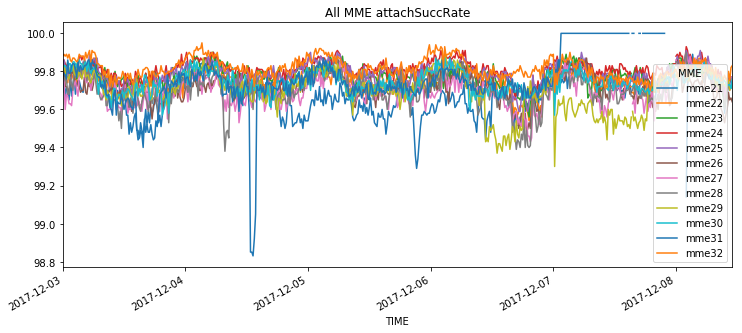

In [18]:
df[daterange[0]:daterange[1]].plot(figsize=(12,5), title='All MME attachSuccRate')

### 2.2 查看各项指标的排序

* 平均成功率排序

In [19]:
stats.loc['mean'].sort_values(ascending=False)

MME
mme32    99.814619
mme24    99.802257
mme23    99.774066
mme25    99.773468
mme31    99.749034
mme30    99.743034
mme22    99.741614
mme29    99.705291
mme26    99.702317
mme28    99.696398
mme27    99.686278
mme21    99.685682
Name: mean, dtype: float64

成功率最高的是mme32， 最低的是mme21和mme27

* 成功率的中位数(50%)排序

In [20]:
stats.loc['50%'].sort_values(ascending=False)

MME
mme32    99.810
mme24    99.800
mme25    99.780
mme23    99.780
mme30    99.740
mme22    99.740
mme31    99.730
mme29    99.710
mme26    99.710
mme28    99.700
mme21    99.695
mme27    99.690
Name: 50%, dtype: float64

##### 平均数和中位数的图表

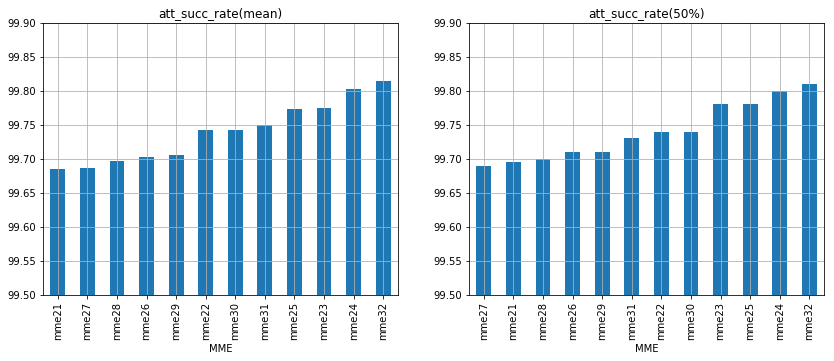

In [21]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5));
stats.loc['mean'].sort_values().plot.bar(title="att_succ_rate(mean)", grid=True, ylim=(99.5,99.9),ax=axes[0])
stats.loc['50%'].sort_values().plot.bar(title="att_succ_rate(50%)", grid=True, ylim=(99.5,99.9),ax=axes[1])

* 标准差

In [22]:
stats.loc['std'].sort_values(ascending=False)

MME
mme31    0.139411
mme29    0.096784
mme21    0.093768
mme28    0.087697
mme27    0.078187
mme26    0.070149
mme30    0.057948
mme22    0.057782
mme25    0.057614
mme23    0.055556
mme32    0.053601
mme24    0.050085
Name: std, dtype: float64

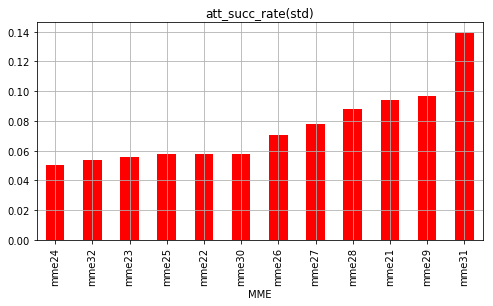

In [23]:
stats.loc['std'].sort_values().plot.bar(figsize=(8,4), grid=True, color='r', title="att_succ_rate(std)")

> 可以看出mme21/26/27/28/29/31的attach成功率波动比较大，而mme24/32/23/25/22/30的波动比较小。

### 2.3 将MME21与attach成功率比较稳定的MME23/24/32做一个对比（时间区间：12/3～12/8）

In [34]:
mmelist = ['mme21','mme24','mme23','mme32']
daterange = ('2017-12-3','2017-12-8')

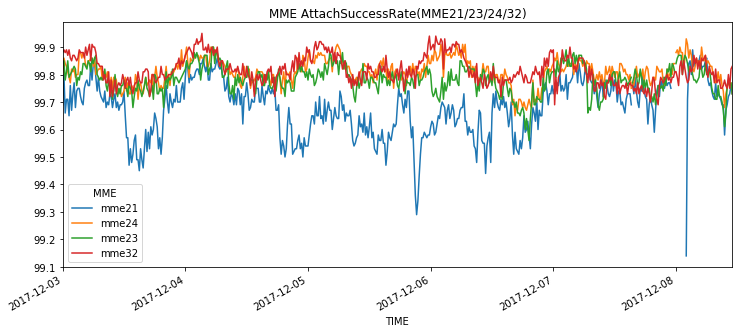

In [35]:
g=df[mmelist][daterange[0]:daterange[1]].plot(figsize=(12,5),title='MME AttachSuccessRate(MME21/23/24/32)')

In [26]:
fig = g.get_figure()

In [31]:
fig.savefig('mme_att_succ_rate_mme21toGood.png')

> 可以看到mme21的指标总体偏低，并且波动也比较大。

### 2.3 将mme21与attach成功率较差的MME28/29/31做一个对比

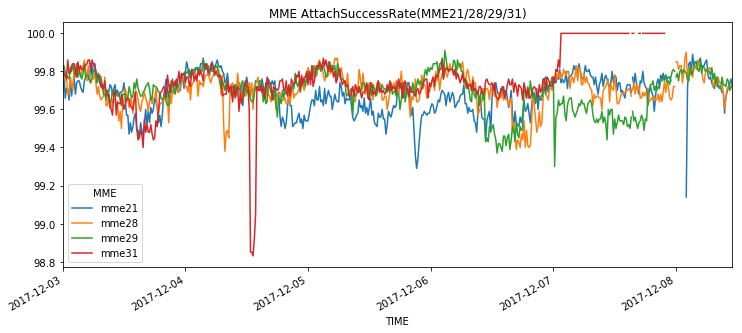

In [36]:
mmelist=['mme21','mme28','mme29','mme31']
g=df[mmelist][daterange[0]:daterange[1]].plot(figsize=(12,5),title='MME AttachSuccessRate(MME21/28/29/31)')

从以上两个对比图可以观察到:

- 每天各台MME的attach成功率大致是一个U型，凌晨和晚上成功率高，白天业务忙时成功率低
- 

将时间轴放大到两天内观察：

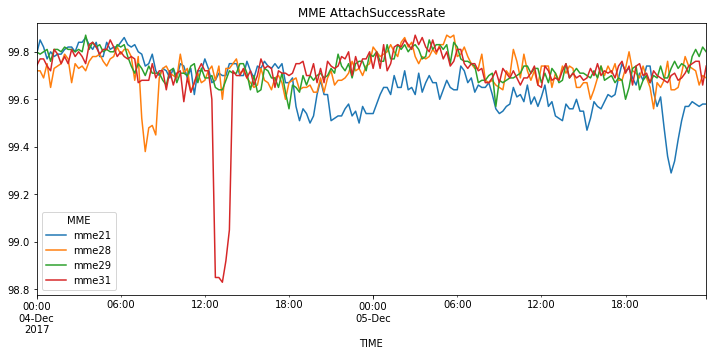

In [37]:
daterange=['2017-12-4','2017-12-5']
g=df[mmelist][daterange[0]:daterange[1]].plot(figsize=(12,5),title='MME AttachSuccessRate')

> <font color="red"> mme28在12月4日凌晨7点左右，attach成功率有一个急剧下降；18点左右开始，MME21的attach成功率下降比较大，并且一直保持比其他MME都低的状态。可以看看12月4日是否对MME21做过什么操作或其对应的服务区域的无线是否有调整。

</font>

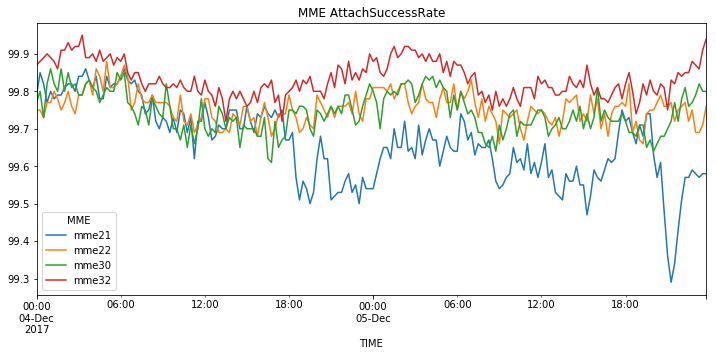

In [30]:
mmelist=['mme21','mme22','mme30','mme32']
g=df[mmelist][daterange[0]:daterange[1]].plot(figsize=(12,5),title='MME AttachSuccessRate')